In [12]:
import numpy as ny
import math
from matplotlib import pyplot as py
%matplotlib inline

In [13]:
N = 200                       #number of points in each direction
x_start, x_end = -4.0, 4.0    #x-direction boundaries
y_start, y_end = -2.0, 2.0    #y-direction boundaries
x = ny.linspace(x_start, x_end, N)
y = ny.linspace(y_start, y_end, N)
X, Y = ny.meshgrid(x, y)

In [14]:
u_inf = 1.0 #freestream speed

#compute freestream velocity field
u_freestream = u_inf * ny.ones((N, N), dtype=float)
v_freestream = ny.zeros((N, N), dtype=float)

#compute stream-function
psi_freestream = u_inf * Y

In [15]:
# we write a function here that computes the velocity components
# give the strength of the sigularity and its location

def get_velocity(strength, xs, ys, X, Y):
    
    u = strength / (2 * ny.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * ny.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    return u, v

In [24]:
#now we will create a function that allows us to compute
# the stream function 
def get_stream_func(strength, xs, ys, X, Y):
    psi = strength / (2 * ny.pi) * ny.arctan2((Y - ys,), (X - xs))
    return psi

In [32]:
strength_source = 5.0 
x_source, y_source = -1.0, 0.0

#compute source velocity field
u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

#get stream function of source

psi_source = get_stream_func(strength_source, x_source, y_source, X, Y)[0]

print(X.shape)
print(Y.shape)
print(psi_source.shape)

(200, 200)
(200, 200)
(200, 200)


In [33]:
#superpostion of source in freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

(200, 200)
(200, 200)
(200, 200)


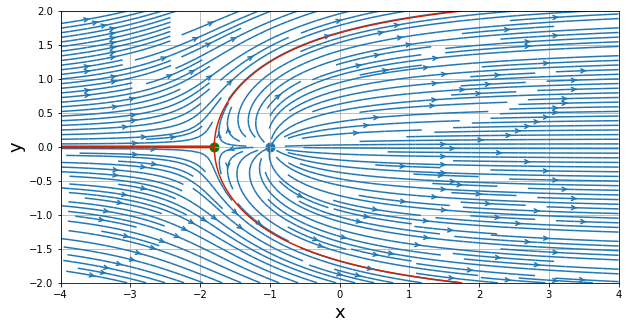

In [36]:
#plot streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize=(width, height))
py.grid(True)
py.xlabel('x', fontsize=18)
py.ylabel('y', fontsize=18)
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)
py.streamplot(X, Y, u, v, density=2, arrowstyle='->')
py.scatter(x_source, y_source, s=80, marker='o')

#calculate stagnation point
x_stagnation = x_source - strength_source / (2 * ny.pi * u_inf)
y_stagnation = y_source

#plot stagnation point
py.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

#plot dividing streamline
py.contour(X, Y, psi, levels=[-strength_source / 2, strength_source / 2],
           colors='#CD2305',linestyles='solid');

CHALLENGE QUESTION

what is the maximum width of the Rankine half body?

hint: use mass conservation, and think about the flow when x is very large.